# Crude Stock Prediction Experiment, Testing Algorithms - (Not Used For Actual Predictions)

In [7]:
import time
import requests

# Define the list of stock symbols
stock_symbols = ['AAPL', 'MSFT', 'GOOGL']

# Define the base URL for Yahoo Finance API
base_url = 'https://query1.finance.yahoo.com/v8/finance/chart/'

# Continuously fetch data every 5 seconds
while True:
    for symbol in stock_symbols:
        url = f"{base_url}{symbol}"
        response = requests.get(url)
        data = response.json()

        # Process the data as needed
        print(f"Data for {symbol}:")
        print(data)
        print("\n")

    # Wait for 5 seconds
    time.sleep(5)

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [8]:
import time
import requests

# Define the list of stock symbols
stock_symbols = ['AAPL', 'MSFT', 'GOOGL']

# Define the base URL for Yahoo Finance API
base_url = 'https://query1.finance.yahoo.com/v8/finance/chart/'

# Continuously fetch data every 5 seconds
while True:
    for symbol in stock_symbols:
        url = f"{base_url}{symbol}"
        response = requests.get(url)

        # Check if the response is valid
        if response.status_code == 200:
            try:
                data = response.json()
                # Process the data as needed
                print(f"Data for {symbol}:")
                print(data)
                print("\n")
            except ValueError as e:
                print(f"JSON decoding error: {e}")
        else:
            print(f"Request failed with status code {response.status_code}")

    # Wait for 5 seconds
    time.sleep(5)

Request failed with status code 403
Request failed with status code 403
Request failed with status code 403


KeyboardInterrupt: 

In [9]:
import requests

def handler(pd: "pipedream"):
  headers = {"X-RapidAPI-Key": f'{{{{custom_fields["X-RapidAPI-Key"]}}}}', "X-RapidAPI-Host": 'apidojo-yahoo-finance-v1.p.rapidapi.com'}
  r = requests.get('https://apidojo-yahoo-finance-v1.p.rapidapi.com/auto-complete', params={"q": 'tesla', "region": 'US'}, headers=headers)
  # Export the data for use in future steps
  return r.json()


In [1]:
import requests

# Define the symbols
symbols = ['AAPL', 'MSFT', 'GOOGL']  # Add more symbols as needed

# Define the base URL for Yahoo Finance API
base_url = "https://query1.finance.yahoo.com/v7/finance/quote"

# Construct the query URL
symbols_param = ','.join(symbols)
query_url = f"{base_url}?lang=en-US&region=US&corsDomain=finance.yahoo.com&symbols={symbols_param}"

# Make the GET request
response = requests.get(query_url)

# Check if the request was successful
if response.status_code == 200:
    try:
        # Parse the JSON response
        data = response.json()

        # Extract the desired data fields
        for result in data["quoteResponse"]["result"]:
            symbol = result.get("symbol")
            display_name = result.get("displayName")
            regular_market_price = result.get("regularMarketPrice")
            financial_currency = result.get("financialCurrency")
            two_hundred_day_average = result.get("twoHundredDayAverage")

            print(f"Symbol: {symbol}")
            print(f"Display Name: {display_name}")
            print(f"Regular Market Price: {regular_market_price}")
            print(f"Financial Currency: {financial_currency}")
            print(f"Two Hundred Day Average: {two_hundred_day_average}")
            print("\n")
    except ValueError as e:
        print(f"JSON decoding error: {e}")
else:
    print(f"Request failed with status code {response.status_code}")

Request failed with status code 403


In [ ]:
pip install requests

In [10]:
import requests

# Define the base URL for Yahoo Finance API
base_url = "https://query1.finance.yahoo.com/v7/finance/quote?lang=en-US&region=US&corsDomain=finance.yahoo.com&symbols=FB,GOOG"

# Make the GET request
response = requests.get(base_url)

# Check if the request was successful
if response.status_code == 200:
    try:
        # Parse the JSON response
        data = response.json()

        # Extract the desired data fields
        for result in data["quoteResponse"]["result"]:
            symbol = result.get("symbol")
            display_name = result.get("longName")
            regular_market_price = result.get("regularMarketPrice")
            currency = result.get("currency")
            two_hundred_day_average = result.get("twoHundredDayAverage")

            print(f"Symbol: {symbol}")
            print(f"Display Name: {display_name}")
            print(f"Regular Market Price: {regular_market_price}")
            print(f"Currency: {currency}")
            print(f"Two Hundred Day Average: {two_hundred_day_average}")
            print("\n")
    except ValueError as e:
        print(f"JSON decoding error: {e}")
else:
    print(f"Request failed with status code {response.status_code}")

Request failed with status code 403


In [3]:
import requests

# Define the URL
url = "https://query1.finance.yahoo.com/v10/finance/quoteSummary/FB?modules=assetProfile%2CbalanceSheetHistory%2CbalanceSheetHistoryQuarterly%2CcalendarEvents%2CcashflowStatementHistory%2CcashflowStatementHistoryQuarterly%2CdefaultKeyStatistics%2Cearnings%2CearningsHistory%2CearningsTrend%2CesgScores%2CfinancialData%2CfundOwnership%2CincomeStatementHistory%2CincomeStatementHistoryQuarterly%2CindexTrend%2CindustryTrend%2CinsiderHolders%2CinsiderTransactions%2CinstitutionOwnership%2CmajorDirectHolders%2CmajorHoldersBreakdown%2CnetSharePurchaseActivity%2Cprice%2CrecommendationTrend%2CsecFilings%2CsectorTrend%2CsummaryDetail%2CsummaryProfile%2CupgradeDowngradeHistory%2Cpageviews%2Cquotetype&ssl=true"

# Make the GET request
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    try:
        # Parse the JSON response
        data = response.json()

        # Process the data as needed
        print(data)
    except ValueError as e:
        print(f"JSON decoding error: {e}")
else:
    print(f"Request failed with status code {response.status_code}")

Request failed with status code 403


[*********************100%%**********************]  1 of 1 completed


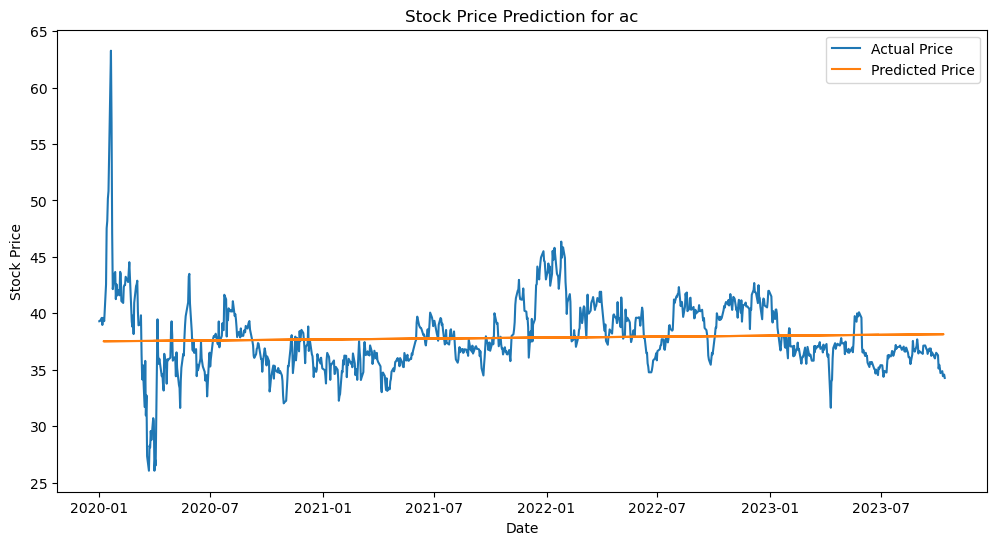

In [16]:
import yfinance as yf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Fetching historical stock data using yfinance
ticker = "ac"
data = yf.download(ticker, start="2020-01-01", end="2025-01-01")

# Creating a pandas dataframe from the fetched data
df = pd.DataFrame(data)

# Preprocessing data
df['Date'] = df.index
df.reset_index(drop=True, inplace=True)

# Creating a simple linear regression model
X = df.index.values.reshape(-1, 1)
y = df['Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Visualization
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Actual Price')
plt.plot(df.loc[y_test.index, 'Date'], y_pred, label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Stock Price Prediction for {}'.format(ticker))
plt.legend()
plt.show()

In [17]:
print(df.head())

        Open       High        Low      Close  Adj Close  Volume       Date
0  38.971146  39.542290  38.875622  39.293533  38.566750    2412 2020-01-02
1  39.104477  39.582088  38.764179  39.303482  38.576511    2512 2020-01-03
2  38.298508  39.592041  38.298508  39.592041  38.859737    3316 2020-01-06
3  39.343285  39.472637  38.398010  38.965176  38.244469    6231 2020-01-07
4  38.696518  39.592041  38.368160  39.592041  38.859737    6432 2020-01-08


[*********************100%%**********************]  1 of 1 completed
Model trained successfully.
Model training score: 0.0037005426186672574
Coefficients: [0.00065998]
Intercept: 37.51485537690016


C:\Users\shane\AppData\Local\Temp\ipykernel_192420\1619699893.py:47: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  plt.plot(pd.date_range(start=df['Date'].iloc[-1], periods=future_days, closed='right'), future_pred, label='Future Predictions')


ValueError: x and y must have same first dimension, but have shapes (29,) and (30,)

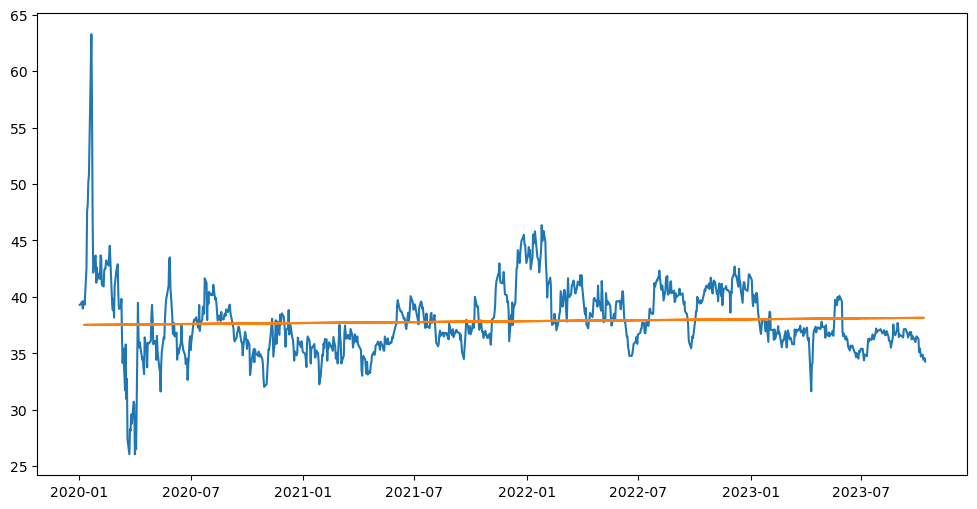

In [18]:
import yfinance as yf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Fetching historical stock data using yfinance
ticker = "ac"
data = yf.download(ticker, start="2020-01-01", end="2024-10-01")

# Creating a pandas dataframe from the fetched data
df = pd.DataFrame(data)

# Preprocessing data
df['Date'] = df.index
df.reset_index(drop=True, inplace=True)

# Creating a simple linear regression model
X = df.index.values.reshape(-1, 1)
y = df['Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = LinearRegression()
model.fit(X_train, y_train)

# Check if the model has been trained
print("Model trained successfully.")

# Evaluate model performance on the training data
train_score = model.score(X_train, y_train)
print(f"Model training score: {train_score}")

# Inspect model coefficients and intercept
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")

# Making predictions
future_days = 30  # Number of future days to predict
future_index = [[i] for i in range(df.index[-1], df.index[-1] + future_days)]
future_pred = model.predict(future_index)

# Visualization
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Actual Price')
plt.plot(df.loc[y_test.index, 'Date'], model.predict(X_test), label='Predicted Price (Test)')
plt.plot(pd.date_range(start=df['Date'].iloc[-1], periods=future_days, closed='right'), future_pred, label='Future Predictions')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Stock Price Prediction for {}'.format(ticker))
plt.legend()
plt.show()

[*********************100%%**********************]  1 of 1 completed
Model trained successfully.
Model training score: 0.0037005426186672574
Coefficients: [0.00065998]
Intercept: 37.51485537690016


ValueError: x and y must have same first dimension, but have shapes (30,) and (31,)

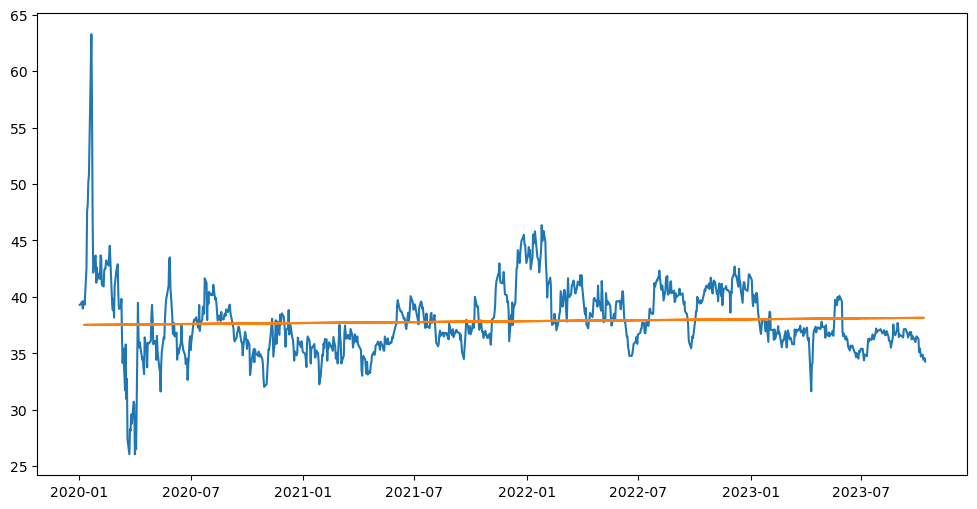

In [21]:
import yfinance as yf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Fetching historical stock data using yfinance
ticker = "ac"
data = yf.download(ticker, start="2020-01-01", end="2024-10-01")

# Creating a pandas dataframe from the fetched data
df = pd.DataFrame(data)

# Preprocessing data
df['Date'] = df.index
df.reset_index(drop=True, inplace=True)

# Creating a simple linear regression model
X = df.index.values.reshape(-1, 1)
y = df['Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = LinearRegression()
model.fit(X_train, y_train)

# Check if the model has been trained
print("Model trained successfully.")

# Evaluate model performance on the training data
train_score = model.score(X_train, y_train)
print(f"Model training score: {train_score}")

# Inspect model coefficients and intercept
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")

# Making predictions
future_days = 30  # Number of future days to predict
future_index = [[i] for i in range(df.index[-1], df.index[-1] + future_days + 1)]
future_pred = model.predict(future_index)

# Generating future date range
future_date_range = pd.date_range(start=df['Date'].iloc[-1], periods=future_days + 1, freq='D')[1:]

# Visualization
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Actual Price')
plt.plot(df.loc[y_test.index, 'Date'], model.predict(X_test), label='Predicted Price (Test)')
plt.plot(future_date_range, future_pred, label='Future Predictions')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Stock Price Prediction for {}'.format(ticker))
plt.legend()
plt.show()

[*********************100%%**********************]  1 of 1 completed


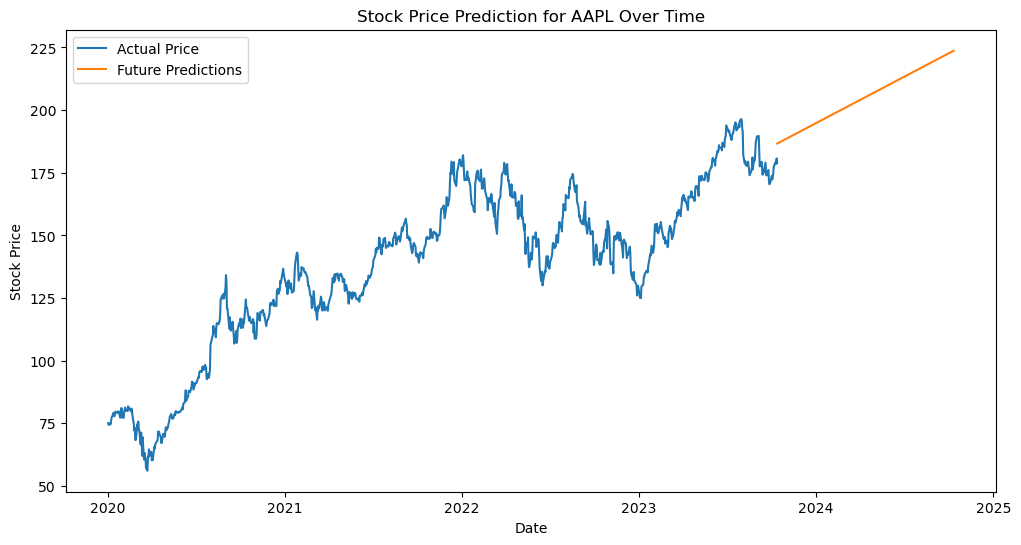

In [23]:
import yfinance as yf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Fetching historical stock data using yfinance
ticker = "AAPL"
data = yf.download(ticker, start="2020-01-01", end="2025-01-01")

# Creating a pandas dataframe from the fetched data
df = pd.DataFrame(data)

# Preprocessing data
df['Date'] = df.index
df.reset_index(drop=True, inplace=True)

# Creating a simple linear regression model
X = df.index.values.reshape(-1, 1)
y = df['Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = LinearRegression()
model.fit(X_train, y_train)

# Generating future indices
future_days = 365  # Predicting for one year
last_index = df.index[-1]
future_index = pd.Index(range(last_index + 1, last_index + future_days + 1))

# Making predictions for the future indices
future_pred = model.predict(future_index.values.reshape(-1, 1))

# Generating the future date range
future_date_range = pd.date_range(start=df['Date'].iloc[-1], periods=future_days, freq='D')

# Visualization
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Actual Price')
plt.plot(future_date_range, future_pred, label='Future Predictions')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Stock Price Prediction for {} Over Time'.format(ticker))
plt.legend()
plt.show()

[*********************100%%**********************]  1 of 1 completed


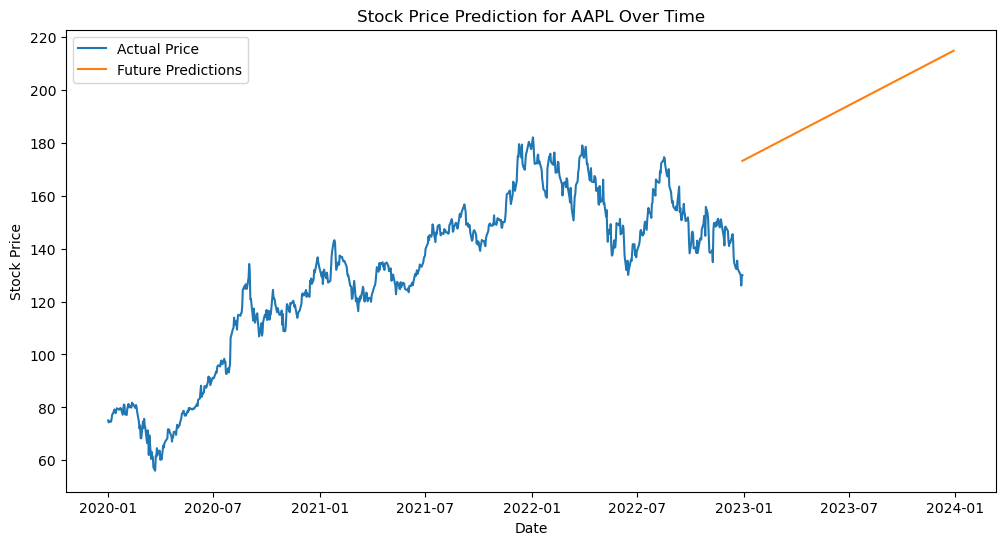

In [24]:
# Fetching historical stock data using yfinance
ticker = "AAPL"
data = yf.download(ticker, start="2020-01-01", end="2023-01-01")

# Creating a pandas dataframe from the fetched data
df = pd.DataFrame(data)

# Preprocessing data
df['Date'] = df.index
df.reset_index(drop=True, inplace=True)

# Creating a simple linear regression model
X = df.index.values.reshape(-1, 1)
y = df['Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = LinearRegression()
model.fit(X_train, y_train)

# Generating future indices
future_days = 365  # Predicting for one year
last_date = df['Date'].iloc[-1]
future_date_range = pd.date_range(start=last_date, periods=future_days, freq='D')

future_index = pd.Index(range(df.index[-1] + 1, df.index[-1] + future_days + 1))

# Making predictions for the future indices
future_pred = model.predict(future_index.values.reshape(-1, 1))

# Visualization
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Actual Price')
plt.plot(future_date_range, future_pred, label='Future Predictions')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Stock Price Prediction for {} Over Time'.format(ticker))
plt.legend()
plt.show()

[*********************100%%**********************]  1 of 1 completed


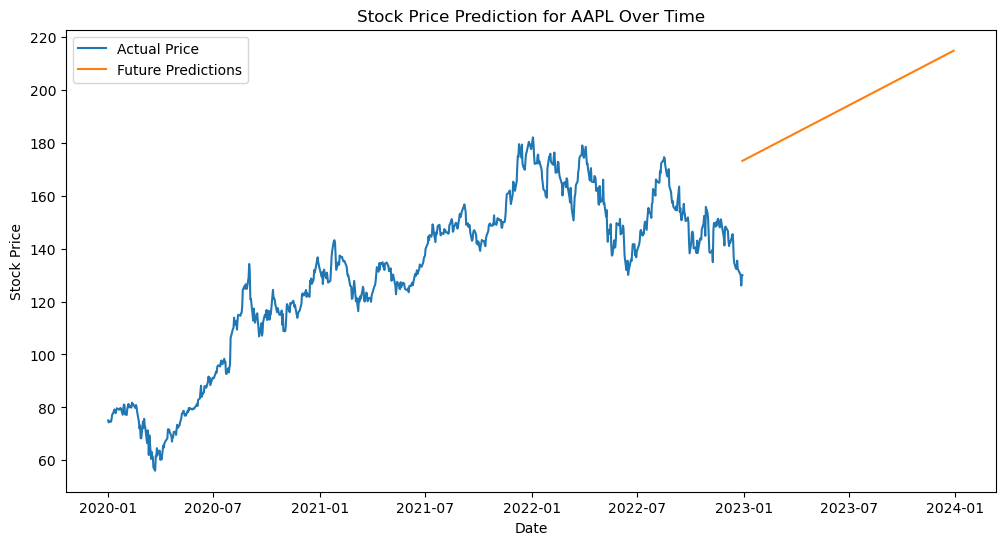

In [25]:
import yfinance as yf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Fetching historical stock data using yfinance
ticker = "AAPL"
data = yf.download(ticker, start="2020-01-01", end="2023-01-01")

# Creating a pandas dataframe from the fetched data
df = pd.DataFrame(data)

# Preprocessing data
df['Date'] = df.index
df.reset_index(drop=True, inplace=True)

# Creating a simple linear regression model
X = df.index.values.reshape(-1, 1)
y = df['Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = LinearRegression()
model.fit(X_train, y_train)

# Generating future indices
future_days = 365  # Predicting for one year
last_date = df['Date'].iloc[-1]
future_date_range = pd.date_range(start=last_date, periods=future_days, freq='D')

future_index = pd.Index(range(df.index[-1] + 1, df.index[-1] + future_days + 1))

# Making predictions for the future indices
future_pred = model.predict(future_index.values.reshape(-1, 1))

# Visualization
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Actual Price')
plt.plot(pd.to_datetime(future_date_range), future_pred, label='Future Predictions')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Stock Price Prediction for {} Over Time'.format(ticker))
plt.legend()
plt.show()

In [26]:
import requests

# Define the symbols you want to fetch data for
symbols = ["FB", "GOOG"]

# Construct the URL
base_url = "https://query1.finance.yahoo.com/v7/finance/quote"
url = f"{base_url}?lang=en-US&region=US&corsDomain=finance.yahoo.com&symbols={','.join(symbols)}"

# Send an HTTP GET request
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    data = response.json()
    results = data.get("quoteResponse", {}).get("result", [])

    # Process the results
    for result in results:
        symbol = result.get("symbol", "")
        display_name = result.get("displayName", "")
        market_price = result.get("regularMarketPrice", "")
        currency = result.get("financialCurrency", "")
        two_hundred_day_avg = result.get("twoHundredDayAverage", "")

        # Do something with the data (e.g., print it)
        print(f"Symbol: {symbol}")
        print(f"Display Name: {display_name}")
        print(f"Market Price: {market_price}")
        print(f"Currency: {currency}")
        print(f"200-day Average: {two_hundred_day_avg}")
        print("-----------------------")

else:
    print(f"Request failed with status code {response.status_code}")

Request failed with status code 403


[*********************100%%**********************]  1 of 1 completed


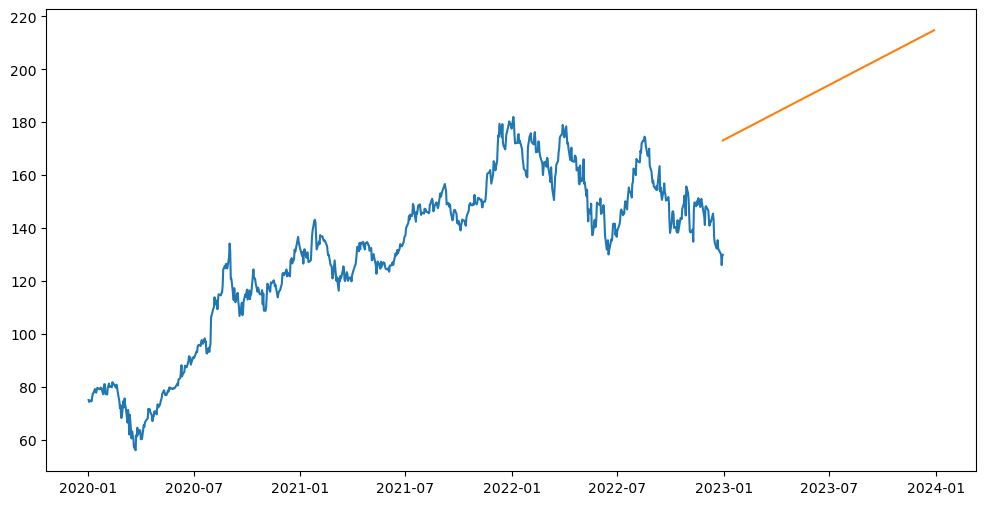

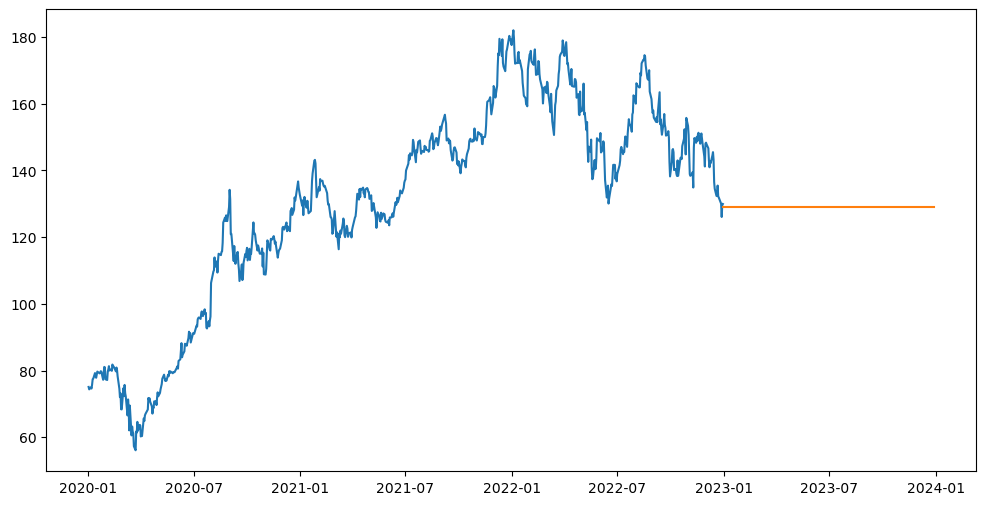

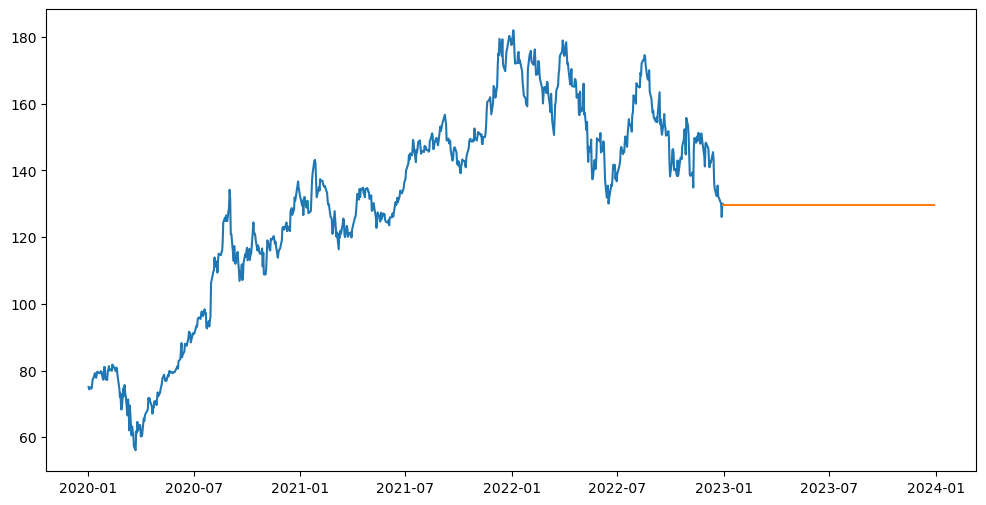

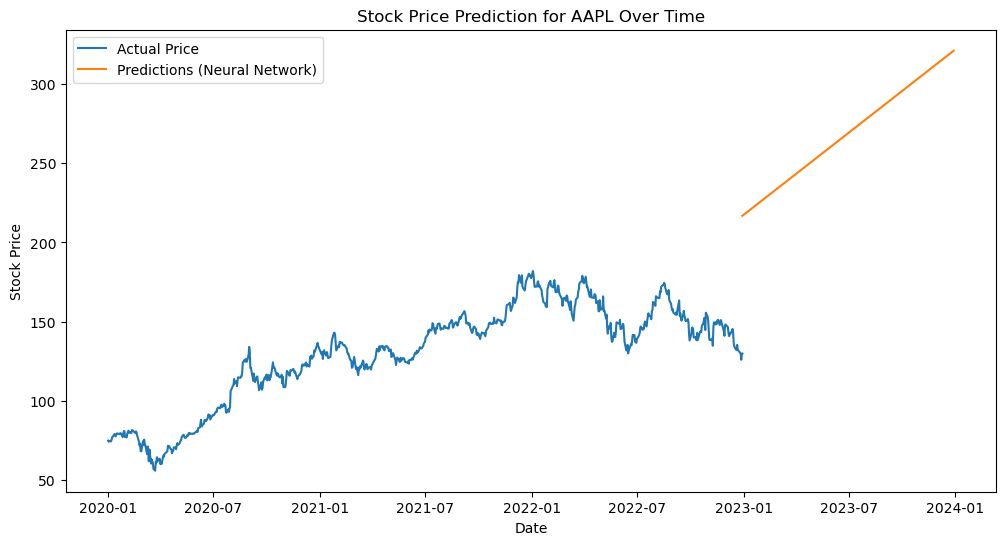

In [27]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt

# Fetching historical stock data using yfinance
ticker = "AAPL"
data = yf.download(ticker, start="2020-01-01", end="2023-01-01")

# Creating a pandas dataframe from the fetched data
df = pd.DataFrame(data)

# Preprocessing data
df['Date'] = df.index
df.reset_index(drop=True, inplace=True)

# Creating models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Neural Network": MLPRegressor(max_iter=1000)
}

# Training and predicting with multiple models
for name, model in models.items():
    X = df.index.values.reshape(-1, 1)
    y = df['Close']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    model.fit(X_train, y_train)

    # Making predictions
    if name != "Neural Network":
        future_pred = model.predict(np.arange(df.index[-1] + 1, df.index[-1] + 366).reshape(-1, 1))
    else:
        future_pred = model.predict(np.arange(df.index[-1] + 1, df.index[-1] + 366).reshape(-1, 1))

    # Visualization
    plt.figure(figsize=(12, 6))
    plt.plot(df['Date'], df['Close'], label='Actual Price')
    future_date_range = pd.date_range(start=df['Date'].iloc[-1], periods=365, freq='D')
    plt.plot(future_date_range, future_pred, label=f'Predictions ({name})')

plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Stock Price Prediction for {} Over Time'.format(ticker))
plt.legend()
plt.show()

Model: Linear Regression
R-squared: 0.7084616280328169
Mean Absolute Error: 14.394394233298316
Mean Squared Error: 308.6497070307845
Root Mean Squared Error: 17.568429270449435


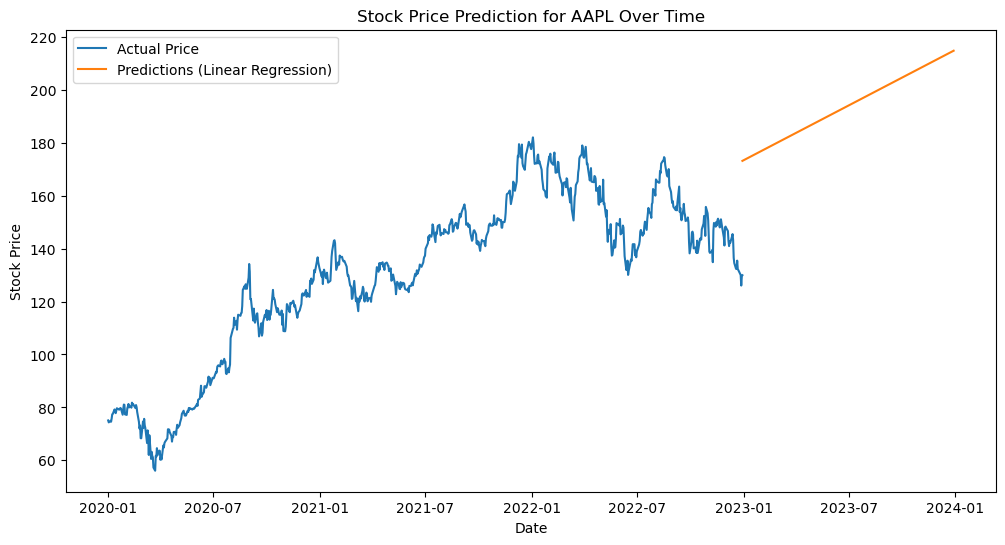

Model: Random Forest
R-squared: 0.9937876897474743
Mean Absolute Error: 1.9161360188534389
Mean Squared Error: 6.576930942189061
Root Mean Squared Error: 2.5645527762534077


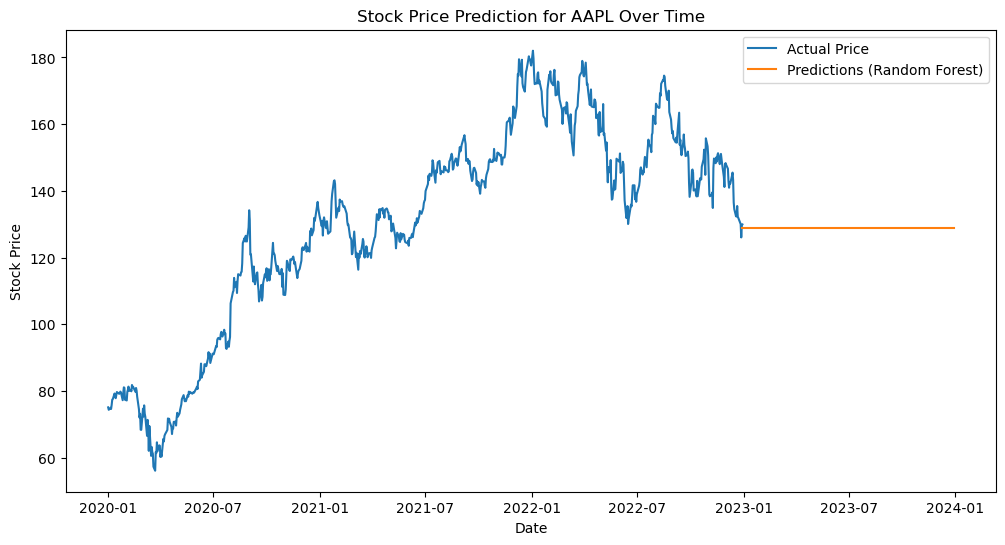

Model: Decision Tree
R-squared: 0.9909324809387838
Mean Absolute Error: 2.258683857164885
Mean Squared Error: 9.599721240315711
Root Mean Squared Error: 3.0983416919887503


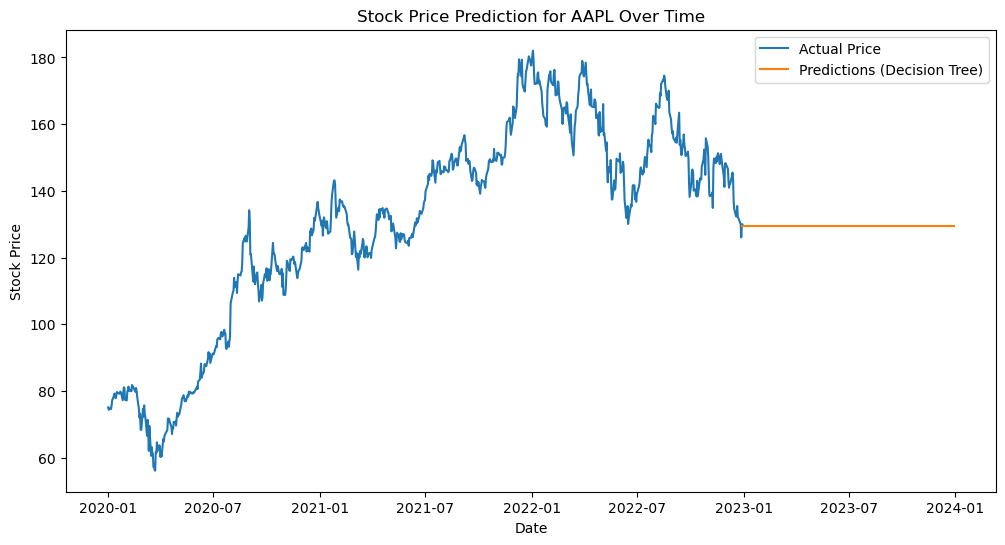

Model: Neural Network
R-squared: 0.4712815932242672
Mean Absolute Error: 20.730083601188905
Mean Squared Error: 559.750609334823
Root Mean Squared Error: 23.659049206061155


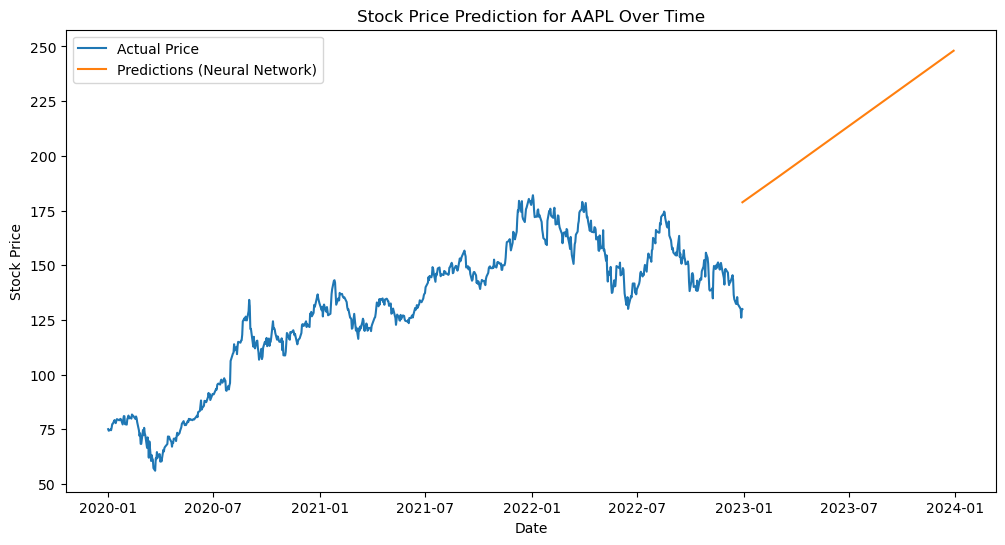

In [28]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Training and predicting with multiple models
for name, model in models.items():
    X = df.index.values.reshape(-1, 1)
    y = df['Close']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    model.fit(X_train, y_train)

    # Making predictions
    if name != "Neural Network":
        future_pred = model.predict(np.arange(df.index[-1] + 1, df.index[-1] + 366).reshape(-1, 1))
    else:
        future_pred = model.predict(np.arange(df.index[-1] + 1, df.index[-1] + 366).reshape(-1, 1))

    # Calculating accuracy scores
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    # Print accuracy scores
    print(f"Model: {name}")
    print(f"R-squared: {r2}")
    print(f"Mean Absolute Error: {mae}")
    print(f"Mean Squared Error: {mse}")
    print(f"Root Mean Squared Error: {rmse}")

    # Visualization (unchanged)
    plt.figure(figsize=(12, 6))
    plt.plot(df['Date'], df['Close'], label='Actual Price')
    future_date_range = pd.date_range(start=df['Date'].iloc[-1], periods=365, freq='D')
    plt.plot(future_date_range, future_pred, label=f'Predictions ({name})')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.title('Stock Price Prediction for {} Over Time'.format(ticker))
    plt.legend()
    plt.show()

In [29]:
import yfinance as yf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Fetching historical stock data using yfinance
ticker = "AAPL"
data = yf.download(ticker, start="2020-01-01", end="2023-01-01")

# Creating a pandas dataframe from the fetched data
df = pd.DataFrame(data)

# Feature Engineering
df['MA50'] = df['Close'].rolling(window=50).mean()
df['MA200'] = df['Close'].rolling(window=200).mean()

# Preprocessing data
df['Date'] = df.index
df.reset_index(drop=True, inplace=True)

# Creating a random forest regression model
X = df[['Open', 'High', 'Low', 'Volume', 'MA50', 'MA200']]
y = df['Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = RandomForestRegressor(n_estimators=100, random_state=0)
model.fit(X_train, y_train)

# Model Evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Generating future indices
future_days = 365  # Predicting for one year
future_index = pd.RangeIndex(start=df.index[-1] + 1, stop=df.index[-1] + future_days + 1)

# Feature Engineering for future indices
future_data = df.iloc[-200:].copy()
future_data.set_index(future_index, inplace=True)
future_data['MA50'] = future_data['Close'].rolling(window=50).mean()
future_data['MA200'] = future_data['Close'].rolling(window=200).mean()

# Making predictions for the future indices
future_pred = model.predict(future_data[['Open', 'High', 'Low', 'Volume', 'MA50', 'MA200']])

# Visualization
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Actual Price')
plt.plot(future_data['Date'], future_pred, label='Future Predictions')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Stock Price Prediction for {} Over Time'.format(ticker))
plt.legend()
plt.show()

[*********************100%%**********************]  1 of 1 completed


ValueError: Input X contains NaN.
RandomForestRegressor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [30]:
import yfinance as yf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Fetching historical stock data using yfinance
ticker = "AAPL"
data = yf.download(ticker, start="2020-01-01", end="2023-01-01")

# Creating a pandas dataframe from the fetched data
df = pd.DataFrame(data)

# Feature Engineering
df['MA50'] = df['Close'].rolling(window=50).mean()
df['MA200'] = df['Close'].rolling(window=200).mean()

# Preprocessing data
df.reset_index(inplace=True)

# Creating a random forest regression model
X = df[['Open', 'High', 'Low', 'Volume', 'MA50', 'MA200']]
y = df['Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = RandomForestRegressor(n_estimators=100, random_state=0)
model.fit(X_train, y_train)

# Model Evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Generating future indices
future_days = 365  # Predicting for one year
future_index = pd.RangeIndex(start=df.index[-1] + 1, stop=df.index[-1] + future_days + 1)

# Feature Engineering for future indices
future_data = df.iloc[-200:].copy()
future_data['MA50'] = future_data['Close'].rolling(window=50).mean()
future_data['MA200'] = future_data['Close'].rolling(window=200).mean()

# Making predictions for the future indices
future_pred = model.predict(future_data[['Open', 'High', 'Low', 'Volume', 'MA50', 'MA200']])

# Visualization
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Actual Price')
plt.plot(future_data['Date'], future_pred, label='Future Predictions')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Stock Price Prediction for {} Over Time'.format(ticker))
plt.legend()
plt.show()

[*********************100%%**********************]  1 of 1 completed


ValueError: Input X contains NaN.
RandomForestRegressor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [31]:
import yfinance as yf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Fetching historical stock data using yfinance
ticker = "AAPL"
data = yf.download(ticker, start="2020-01-01", end="2025-01-01")

# Creating a pandas dataframe from the fetched data
df = pd.DataFrame(data)

# Handling missing values
df.fillna(method='ffill', inplace=True)  # Forward fill missing values

# Feature Engineering
df['MA50'] = df['Close'].rolling(window=50).mean()
df['MA200'] = df['Close'].rolling(window=200).mean()

# Preprocessing data
df.reset_index(inplace=True)

# Creating a random forest regression model
X = df[['Open', 'High', 'Low', 'Volume', 'MA50', 'MA200']]
y = df['Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = RandomForestRegressor(n_estimators=100, random_state=0)
model.fit(X_train, y_train)

# Model Evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Generating future indices
future_days = 365  # Predicting for one year
future_index = pd.RangeIndex(start=df.index[-1] + 1, stop=df.index[-1] + future_days + 1)

# Feature Engineering for future indices
future_data = df.iloc[-200:].copy()
future_data['MA50'] = future_data['Close'].rolling(window=50).mean()
future_data['MA200'] = future_data['Close'].rolling(window=200).mean()

# Making predictions for the future indices
future_pred = model.predict(future_data[['Open', 'High', 'Low', 'Volume', 'MA50', 'MA200']])

# Visualization
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Actual Price')
plt.plot(future_data['Date'], future_pred, label='Future Predictions')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Stock Price Prediction for {} Over Time'.format(ticker))
plt.legend()
plt.show()

[*********************100%%**********************]  1 of 1 completed


ValueError: Input X contains NaN.
RandomForestRegressor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [33]:
df.info

<bound method DataFrame.info of           Date        Open        High         Low       Close   Adj Close  \
0   2020-01-02   74.059998   75.150002   73.797501   75.087502   73.249023   
1   2020-01-03   74.287498   75.144997   74.125000   74.357498   72.536911   
2   2020-01-06   73.447502   74.989998   73.187500   74.949997   73.114883   
3   2020-01-07   74.959999   75.224998   74.370003   74.597504   72.771019   
4   2020-01-08   74.290001   76.110001   74.290001   75.797501   73.941643   
..         ...         ...         ...         ...         ...         ...   
948 2023-10-09  176.809998  179.050003  175.800003  178.990005  178.990005   
949 2023-10-10  178.100006  179.720001  177.949997  178.389999  178.389999   
950 2023-10-11  178.199997  179.850006  177.600006  179.800003  179.800003   
951 2023-10-12  180.070007  182.339996  179.039993  180.710007  180.710007   
952 2023-10-13  181.419998  181.929993  178.139999  178.850006  178.850006   

        Volume        MA50     

In [34]:
import yfinance as yf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Fetching historical stock data using yfinance
ticker = "AAPL"
data = yf.download(ticker, start="2020-01-01", end="2023-01-01")

# Creating a pandas dataframe from the fetched data
df = pd.DataFrame(data)

# Filling missing values with column means
df.fillna(df.mean(), inplace=True)

# Feature Engineering
df['MA50'] = df['Close'].rolling(window=50).mean()
df['MA200'] = df['Close'].rolling(window=200).mean()

# Preprocessing data
df['Date'] = df.index
df.reset_index(drop=True, inplace=True)

# Creating a random forest regression model
X = df[['Open', 'High', 'Low', 'Volume', 'MA50', 'MA200']]
y = df['Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = RandomForestRegressor(n_estimators=100, random_state=0)
model.fit(X_train, y_train)

# Model Evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Generating future indices
future_days = 365  # Predicting for one year
future_index = pd.RangeIndex(start=df.index[-1] + 1, stop=df.index[-1] + future_days + 1)

# Feature Engineering for future indices
future_data = df.iloc[-200:].copy()
future_data.set_index(future_index, inplace=True)
future_data['MA50'] = future_data['Close'].rolling(window=50).mean()
future_data['MA200'] = future_data['Close'].rolling(window=200).mean()

# Filling missing values with column means
future_data.fillna(future_data.mean(), inplace=True)

# Making predictions for the future indices
future_pred = model.predict(future_data[['Open', 'High', 'Low', 'Volume', 'MA50', 'MA200']])

# Visualization
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Actual Price')
plt.plot(future_data['Date'], future_pred, label='Future Predictions')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Stock Price Prediction for {} Over Time'.format(ticker))
plt.legend()
plt.show()

[*********************100%%**********************]  1 of 1 completed


ValueError: Input X contains NaN.
RandomForestRegressor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [35]:
import yfinance as yf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Fetching historical stock data using yfinance
ticker = "AAPL"
data = yf.download(ticker, start="2020-01-01", end="2023-01-01")

# Creating a pandas dataframe from the fetched data
df = pd.DataFrame(data)

# Filling missing values with column means
df.fillna(df.mean(), inplace=True)

# Feature Engineering
df['MA50'] = df['Close'].rolling(window=50).mean()
df['MA200'] = df['Close'].rolling(window=200).mean()

# Drop rows with NaN values
df.dropna(inplace=True)

# Preprocessing data
df['Date'] = df.index
df.reset_index(drop=True, inplace=True)

# Creating a random forest regression model
X = df[['Open', 'High', 'Low', 'Volume', 'MA50', 'MA200']]
y = df['Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = RandomForestRegressor(n_estimators=100, random_state=0)
model.fit(X_train, y_train)

# Model Evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Generating future indices
future_days = 365  # Predicting for one year
future_index = pd.RangeIndex(start=df.index[-1] + 1, stop=df.index[-1] + future_days + 1)

# Feature Engineering for future indices
future_data = df.iloc[-200:].copy()
future_data.set_index(future_index, inplace=True)
future_data['MA50'] = future_data['Close'].rolling(window=50).mean()
future_data['MA200'] = future_data['Close'].rolling(window=200).mean()

# Filling missing values with column means
future_data.fillna(future_data.mean(), inplace=True)

# Making predictions for the future indices
future_pred = model.predict(future_data[['Open', 'High', 'Low', 'Volume', 'MA50', 'MA200']])

# Visualization
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Actual Price')
plt.plot(future_data['Date'], future_pred, label='Future Predictions')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Stock Price Prediction for {} Over Time'.format(ticker))
plt.legend()
plt.show()

[*********************100%%**********************]  1 of 1 completed
Mean Squared Error: 2.7949385600272296


ValueError: Length mismatch: Expected 200 rows, received array of length 365

[*********************100%%**********************]  1 of 1 completed
Mean Squared Error: 2.7949385600272296


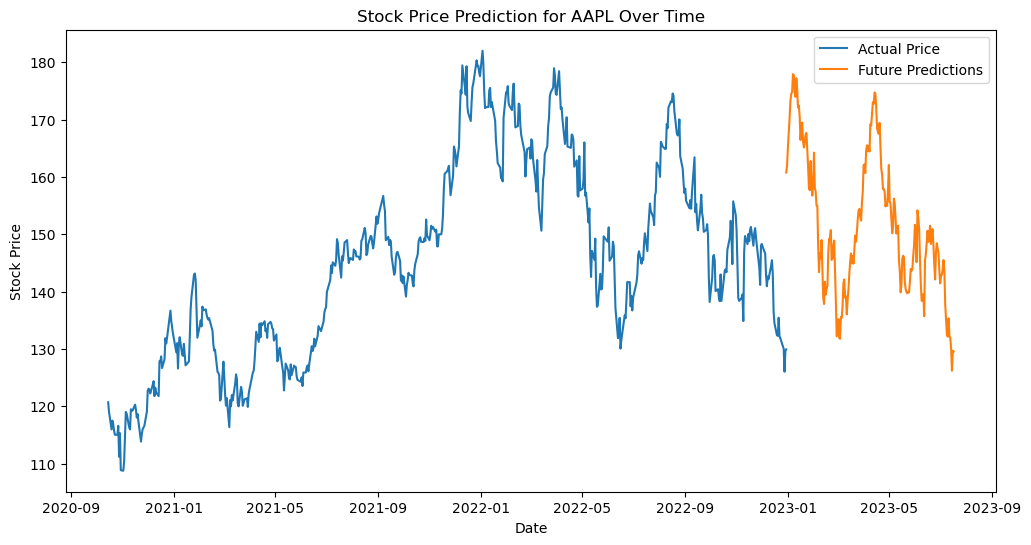

In [36]:
import yfinance as yf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Fetching historical stock data using yfinance
ticker = "AAPL"
data = yf.download(ticker, start="2020-01-01", end="2023-01-01")

# Creating a pandas dataframe from the fetched data
df = pd.DataFrame(data)

# Filling missing values with column means
df.fillna(df.mean(), inplace=True)

# Feature Engineering
df['MA50'] = df['Close'].rolling(window=50).mean()
df['MA200'] = df['Close'].rolling(window=200).mean()

# Drop rows with NaN values
df.dropna(inplace=True)

# Preprocessing data
df['Date'] = df.index
df.reset_index(drop=True, inplace=True)

# Creating a random forest regression model
X = df[['Open', 'High', 'Low', 'Volume', 'MA50', 'MA200']]
y = df['Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = RandomForestRegressor(n_estimators=100, random_state=0)
model.fit(X_train, y_train)

# Model Evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Generating future indices
future_days = 365  # Predicting for one year
future_index = pd.RangeIndex(start=df.index[-1] + 1, stop=df.index[-1] + future_days + 1)

# Feature Engineering for future indices
future_data = df.tail(200).copy()
future_data['Date'] = pd.date_range(start=df['Date'].iloc[-1], periods=200, freq='D')
future_data.set_index('Date', inplace=True)
future_data['MA50'] = future_data['Close'].rolling(window=50).mean()
future_data['MA200'] = future_data['Close'].rolling(window=200).mean()

# Filling missing values with column means
future_data.fillna(future_data.mean(), inplace=True)

# Making predictions for the future indices
future_pred = model.predict(future_data[['Open', 'High', 'Low', 'Volume', 'MA50', 'MA200']])

# Visualization
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Actual Price')
plt.plot(future_data.index, future_pred, label='Future Predictions')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Stock Price Prediction for {} Over Time'.format(ticker))
plt.legend()
plt.show()
